# RNA Polymerase with ANMT Example

    This example demonstrates building an RNA Polymerase protein with a RNA fragment inside


### The structure is available here https://www.rcsb.org/structure/6ASX

### This System contains both RNA and Protein, to prepare it for simulation we must do the following:

    1. Separate the RNA and Protein components of the system into separate PDB structures
        (this step is done in chimera)
        
    2. Convert each component to oxDNA format
    
    3. Combine into a single system
    
    4. Simulate

In [1]:
import models as m
import os

## 1. Separate RNA and Protein Components 
    
    ->Open 6asx.pdb in Chimera
    ->Select the RNA chains and save as PDB
    ->Select the Protein chains and save as PDB
    
    The separated PDB files are provided as (RNA.pdb -> RNA Component) and (RNAP.pdb -> Protein Component)

## 2a. Protein Conversion into oxDNA format

    First we take our PDB file and fill in any missing Residues using Modeller
    We skip this step in this example
    To see the basics of a modeller reconstruction see Modeller Reconstruction Example
    To see a full reconstruction done quickly see Batch Modeller Example
    
    The Reconstructed File is Proviede as 'RNAP_MOD.pdb'

In [2]:
wdir = os.getcwd()

# We will start from our reconstructed RNA Polymerase generated with Modeller 
coord, mp = m.get_pdb_info(wdir + '/examples/RNAPT/RNAP_MOD.pdb', returntype='cm')

# The Bfactors are not convserved from the orginal PDB file!!!!!
# B-factors read from a modeller reconstruction are wrong

# The only way currently supported to adjust the experimental B-factors from the orignal PDB file
# to the new length is shown below

# First we need the entire sequence built with Modeller with gaps wherever Modeller inserted a Residue
# We easily get this from the Modeller Protocol used in the Modeller Example
aseq = m.read_seqfile(wdir+'/examples/RNAP/rnap_adjseq.txt') # More details on this later

# We need our Bfactors from the original PDB file
bfacts = m.get_pdb_info(wdir + '/examples/RNAPT/RNAP.pdb', returntype='b')

# Adjust bfactors to new sequence (Just fills anywhere there is a gap '-' in the sequence with the fill value)
nbfacts = m.map_bfactors(aseq, bfacts, fillvalue=70)

# Very Unconstrained chain removal (better fit of B-factors)
coord = coord[:-10]
nbfacts = nbfacts[:-10]

INFO: Don't worry about Discontinuous chain warnings!


/home/jonah/anaconda3/lib/python3.8/site-packages/Bio/PDB/PDBParser.py:395: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 25388
  warnings.warn(


INFO: N = 3244
INFO: Don't worry about Discontinuous chain warnings!


/home/jonah/anaconda3/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain J is discontinuous at line 25950.
  warnings.warn(


INFO: N = 3179


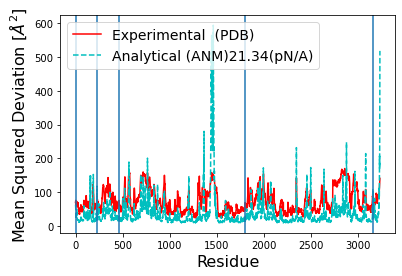

In [3]:
# Now we will make an ANMT model using the coordinates and bfactors
rnapt = m.ANMT(coord, nbfacts, T=300, cutoff=13)
rnapt.calc_ANM_unitary(cuda=False)
rnapt.anm_compare_bfactors_jupyter(bmap=mp)

In [7]:
# Let's Export Our Model
m.export_to_simulation(rnapt, './examples/RNAPT/RNAP_MOD.pdb', upstreamdir='/examples/RNAPT')

/home/jonah/anaconda3/lib/python3.8/site-packages/Bio/PDB/PDBParser.py:395: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 25388
  warnings.warn(


N =  3244
Wrote Par File to /home/jonah/CLionProjects/oxdna/oxDNA/ANM_EXAMPLES/examples/RNAPT/generated.par
Wrote Configuration (dat) File to /home/jonah/CLionProjects/oxdna/oxDNA/ANM_EXAMPLES/examples/RNAPT/generated.dat
Wrote Topology File to /home/jonah/CLionProjects/oxdna/oxDNA/ANM_EXAMPLES/examples/RNAPT/generated.top


    Save these Files as rnapt.top, .dat, and .par

## 2b. Convert the RNA component to oxDNA format
### Here we make use of an existing conversion server specifcally for the DNA/RNA models of oxDNA

    1. Go to http://tacoxdna.sissa.it/PDB_oxDNA
    2. Upload RNA.pdb and click convert
    3. Save the Output files
        these files are provided as rna.dat and rna.top in /examples/RNAPT/


# 3. Combining Components

## For this step, we will use oxView to build our system
    
    1. Open index.html in your browser from the oxView download
    2. Drag and drop the RNAP topology and dat files onto oxView
    3. Drag and drop the RNA topology and dat files onto oxView
    
### This is what you should see

![oxview rnap complex](./examples/imgs/rnap_comp.png)

    Rename the files generated to 'rnapt' .dat, .top and .par


## To build our system we do the following:

    1. Drag and drop rna.dat and rna.top into oxView
    2. Drag and drop rnapt.dat and rnapt.top into oxView
    3. Drag and drop rnapt.par into oxView
    4. Click Simulation files to download the oxView files
    
    Rename the files downloaded to 'rnapt_complex' .top, .dat, and .par
    
## These Files are not ready for simulation

    Why?
    
    -Oxview in its current implementation does not preserve the a1 and a3 vectors in the .dat files for proteins
    -Oxview does not save the Angle Param### The RNA in the RNA polymerase is very tightly interweaved with the protein particles

### Using the power of hindsight, we know this structure will not run as it is due to a myriad of excluded volume problems

    Keep in mind the 3.8 A crystal resolution, to properly place the RNA great care must be taken in 
    positioning each RNA Nucleotide

### Instead, for the purpose of this example we will use a fragment of the full RNA sequence

    We repeat the above steps after refreshing our browser, using the provided 'rnac' topology and dat 
    files instead (provided in examples/RNAP/ directory)
    
    Now we have:
    
![rnac oxview](./examples/imgs/rnac_comp.png)
    
## In Oxviews's current implementation we must upload the Parameter file (rnap.par) to output the correct protein Topology and Parameter file for a DNA/Protein system

    In the system above we simply drap and drop 'rnap.par' onto the system
    
    Now we have:
    
![rnac anm](./examples/imgs/rnac_anm.png)   
    
## This is a view of the ANM network we have created, each bond is drawn (which is why it looks like a mummy)    

    
### Go ahead and download the simulation files by clicking Simulation files in the Top left corner of the oxView menu under 'File'

    We now have the full complex simulation files, save them as 'rnap_complex' .top, .dat, and .par
    files into our (/examples/RNAP/)
    
    
### For a hybrid ANM model, (DNANM, RNANM), our File Prep would be complete here
    
    
# NOTE: In the current Implementation of oxView, the Parameter and Dat Files must be manually fixed for any model with Bending/Torsional Interactions

    The additional preparation is shown below
    
   

In [9]:
## Just Functions Read Below to continue Tutorial

import numpy as np

# Returns header (top 3 lines of file) and dat file data as np array
def readdat(datfile):
    o=open(datfile, 'r')
    tmp = o.read()
    data = tmp.split('\n')
    del data[-1]
    head = data[0:3]
    del data[0:3]
    mdata = []
    for x in data:
        rowd = x.split()
        rowdf = [float(x) for x in rowd]
        mdata.append(rowdf)
    rdata = np.asarray(mdata)
    return head, rdata

# Returns header of file and Topology data as a List of Tuples
def readtopfile(topfile):
    o=open(topfile, 'r')
    tmp = o.read()
    o.close()
    data = tmp.split('\n')
    #print(data[0])
    #print(data[-1])
    head = data[0]
    del data[0]
    topdata = []
    for x in data:
        if x == '':
            continue
        rowd = x.split()
        strand = int(rowd[0])
        base = str(rowd[1])
        n3 = int(rowd[2])
        n5 = int(rowd[3])
        if len(rowd) > 4:
            #print(rowd)
            neighs = [int(i) for i in rowd[4:]]
        else:
            neighs = [-1]
        topdata.append((strand, base, n3, n5, neighs))
    return head, topdata

# Returns copy of topdata with strandids shifted by strand_offset and n3, n5, and neighs shifted 
# by particle_offset
def shifttop(topdata, strand_offset, particle_offset):
    sids, bids, n3, n5, nay = zip(*topdata)
    nsids = [x-strand_offset for x in sids]
    #print(nsids)
    nbids = bids
    nn3 = [x+particle_offset if x > -1 else -1 for x in n3]
    nn5 = [x+particle_offset if x > -1 else -1 for x in n5]
    nneighs = []
    for neb in nay:
        if isinstance(neb, list):
            #print(neb)
            nneb = [x+particle_offset if x > -1 else -1 for x in neb]
            nneighs.append(nneb)
        else:
            nneighs.append([-1])
    return list(zip([nsids, bids, nn3, nn5, nneighs]))

# Combine Topologies into single tuple list, in order they are fed in
def combine_top(*tops):
    tmas = []
    for topdata in tops:
        tmas += topdata
    return tmas


# Returns String containing a full Topology File, use file.write(str) to write to file
def writetop(head, topdata):
    s, b, n3, n5, nay = zip(*topdata)
    strnay = [[map(str,i) if isinstance(i,list) else str(i) for i in y] for y in nay]
    #print(b)
    master = list(zip([str(sid) for sid in s], b, [str(nn3) for nn3 in n3], [str(nn5) for nn5 in n5], strnay))
    top = ''
    top += head + '\n'
    #print(master)
    #print([x for x,y,z,v,w in master])
    strtop = [' '.join([x, y, z, w, ' '.join(v)]) if v[0] != '-1' else ' '.join([x, y, z, w]) for (x, y, z, w, v) in master]
    top += '\n'.join(strtop)
    return top

# Returns header of file and parfile data in a tuple list
def readpar(parfile):
    o=open(parfile, 'r')
    tmp = o.read()
    o.close()
    data = tmp.split('\n')
    print(data[-1])
    head = data[0]
    del data[0]
    pardata = []
    for dat in data:
        if dat == '':
            continue
        d = dat.split()
        i = int(d[0])
        j = int(d[1])
        dis = float(d[2])
        pt = str(d[3])
        pot = float(d[4])
        if j-i == 1:
            ang_params = [float(d[5]), float(d[6]), float(d[7]), float(d[8])]
            pardata.append((i, j, dis, pt, pot, ang_params))
        else:
            pardata.append((i, j, dis, pt, pot, [-1]))
    return head, pardata

# Shift particle numbers in pardata by particle_offset
def shiftpar(pardata, particle_offset):
    iz, jz, disz, ptz, potz, angz = zip(*pardata)
    siz = [x + particle_offset for x in iz]
    sjz = [x + particle_offset for x in jz]
    nlist = list(zip(siz, sjz, disz, ptz, potz, angz))
    return nlist

# Returns String containing Full Parfile, use file.write(str) to write to file
def writepar(head, pardata):
    iz, jz, disz, ptz, potz, angz = zip(*pardata)
    strang = [[map(str,i) if isinstance(i,list) else str(i) for i in y] for y in angz]
    master = list(zip([str(sid) for sid in iz], [str(sid) for sid in jz], [str(sid) for sid in disz], ptz, [str(p) for p in potz], strang))
    par = ''
    par += head + '\n'
    strpar = [' '.join([x, y, z, w, v, ' '.join(u)]) if u[0] != '-1' else ' '.join([x, y, z, w, v]) for (x, y, z, w, v, u) in master]
    par += '\n'.join(strpar)
    return par

# Combine Parfiles into single tuple list, in order they are fed in
def combine_pars(*pars):
    pmas = []
    for par in pars:
       pmas += par
    return pmas
    

## We define the above functions for quick edits to any topology, parameter, or dat file


### Looking through the current simulation files 'rnapt_complex', the Topology and Parameter files are correct! We only need to add the a1 and a3 vectors to our .dat file

    Using the functions above we will replace the a1, a3 vectors in 'rnapt_complex' with those from the 
    original protein alone 'rnapt'

In [12]:
# First Let's read in our files
h1, d1 = readdat('./examples/RNAPT/rnapt_complex.dat') # Right Coordinates, Wrong vectors
h2, d2 = readdat('./examples/RNAPT/rnapt.dat') # Wrong Coordinates, Right Vectors

rows = [] # holds datfile lists in each line
# For each element in d1
for iid, i in enumerate(d1):
    if iid == 0: # Append Header to beginning, every row indicates a new line
        rows.append(h1[0])
        rows.append(h1[1])
        rows.append(h1[2])
    if iid < len(d2):  # Only access protein data in d1
        d1[iid, 3:] = d2[iid, 3:] # Copy Vectors from d2 into corresponding fields on d1
                                  # Now have right coordinates, right vectors
        rows.append([str(x) for x in d1[iid]]) # Convert Numbers to Strings and append to to rows list
    else:
        # Nucleotide data is untouched
        rows.append([str(x) for x in d1[iid]]) # Convert Numbers to Strings and append to to rows list


nr = [' '.join(x) if xid > 2 else x for xid, x in enumerate(rows)] # Make Lines from list of strs
full = '\n'.join(nr) # Separate entries by newline, for full string of 

print(full)

x = open('./examples/RNAPT/rnapt_complex2.dat','w') # Open a new file
x.write(full) # Write File
x.write('\n')
x.close()


t = 0
b = 57 57 57
E = 0 0 0
-0.3045728802680969 4.506518363952637 -6.97294282913208 0.2730558455417517 -0.762132968726889 -0.5870211607727767 0.0 -0.5870211607727767 0.762132968726889 0.0 0.0 0.0 0.0 0.0 0.0
-0.026691244915127754 4.200345039367676 -6.818563938140869 -0.5066264879694645 -0.3352835923065958 0.7943012743397246 -0.0 0.7943012743397246 0.3352835923065958 0.0 0.0 0.0 0.0 0.0 0.0
0.07028026878833771 3.7844021320343018 -6.929270267486572 0.5071237198714066 -0.48084441443014925 -0.7152721033670433 0.0 -0.7152721033670433 0.48084441443014925 0.0 0.0 0.0 0.0 0.0 0.0
0.22536487877368927 3.441481828689575 -6.696468830108643 -0.7827346204599845 -0.1861702958699683 0.5938578406226969 -0.0 0.5938578406226969 0.1861702958699683 0.0 0.0 0.0 0.0 0.0 0.0
0.6147748827934265 3.2345077991485596 -6.725231647491455 0.6726853376863348 0.5854925287728686 0.4524300335001793 0.0 0.4524300335001793 -0.5854925287728686 0.0 0.0 0.0 0.0 0.0 0.0
0.6524602770805359 2.7934410572052 -6.73180627822876 -0.

# 4. Simulation

## We have now generated our Simulation Files!

### Due to the proximity of the Protein and RNA, we are skipping the long relaxation process and instead provide you with the Relaxed files

    These are 'rnap_fullcomplex' .top and .par and 'rnap_fullcomplex_r.dat'

In [2]:
## Let's Run and MD Simulation
import os

wdir = os.getcwd()

#Switch Directories to /examples/RNAP/
os.chdir(wdir + '/examples/RNAPT/')

# Executable Inputfile
!/home/jonah/CLionProjects/oxdna/oxDNA/build/bin/oxDNA input_cuda

os.chdir(wdir)

           0         0.0000   0.432242   0.299630   0.731872 
        1000         0.5000   0.304673   0.423986   0.728659 
        2000         1.0000   0.317937   0.407116   0.725053 
        3000         1.5000   0.326203   0.396797   0.723001 
        4000         2.0000   0.313969   0.406421   0.720390 
        5000         2.5000   0.322292   0.395413   0.717705 
        6000         3.0000   0.310794   0.404591   0.715385 
        7000         3.5000   0.316285   0.396842   0.713127 
        8000         4.0000   0.310983   0.400346   0.711330 
        9000         4.5000   0.314183   0.394603   0.708786 
       10000         5.0000   0.307932   0.399124   0.707055 
